## Using OpenCV library 

OpenCV-Python SIFT

https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html

![nn](data/sift_a.png)
![nn](data/sift_b.png)

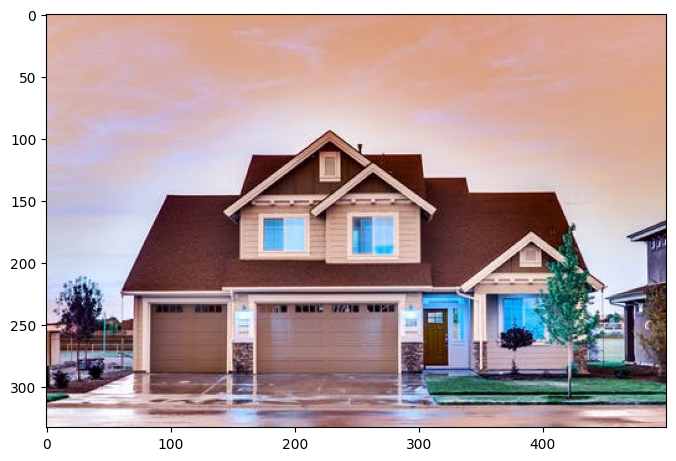

In [8]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


img = cv.imread('data/house.jpeg') # img
plt.figure(figsize=(8,6))
plt.imshow(img)

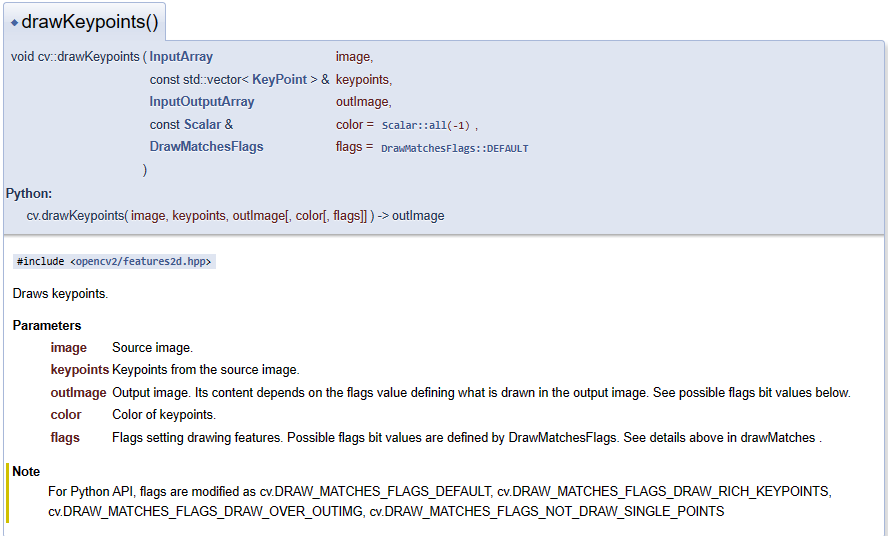

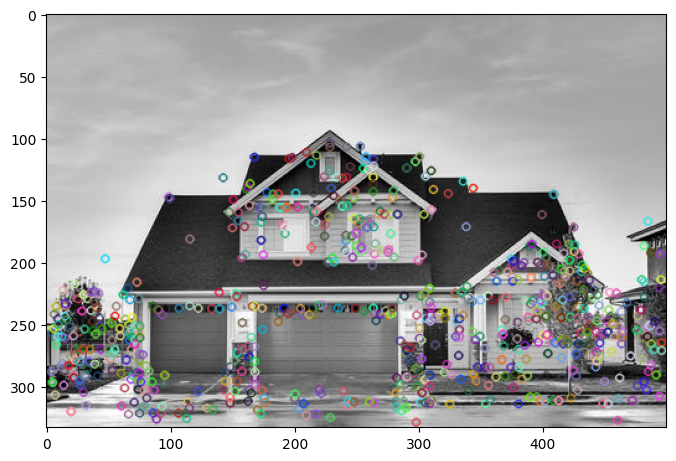

In [12]:
img = cv.imread('data/house.jpeg') # img
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create() # SIFT create
kp = sift.detect(gray,None) # None 은 마스크 데이터
img = cv.drawKeypoints(gray, kp, img)
plt.figure(figsize=(8,6))
plt.imshow(img)

* 크기와 방향을 모두 가진 key points

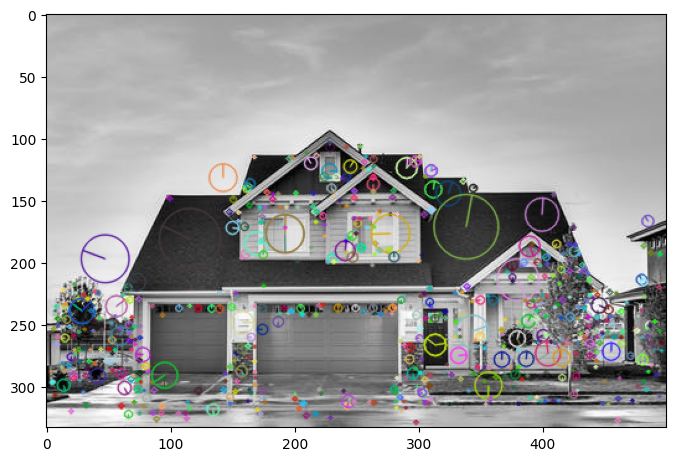

In [13]:
img=cv.drawKeypoints(gray,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(8,6))
plt.imshow(img)

* key_point sample

In [5]:
sift = cv.SIFT_create()
kp, des = sift.detectAndCompute(gray,None)

print("angle: {:.2f} \n octave: {:.2f} \n coordinates: ({:.2f} {:.2f}) \n response: {:.2f} \n size: {:.2f} \n".format(kp[0].angle, kp[0].octave, kp[0].pt[0], kp[0].pt[1], kp[0].response, kp[0].size))

kp = np.array([i.pt for i in kp])
print(kp.shape)
print(des.shape)

angle: 357.10 
 octave: 2294271.00 
 coordinates: (3.84 287.84) 
 response: 0.07 
 size: 1.85 

(740, 2)
(740, 128)


## Using Kornia library

In [14]:
import torch
import kornia
import kornia.feature as KF
from torchvision import transforms
from PIL import Image

filename = 'data/house.jpeg'

tensor = transforms.ToTensor()(Image.open(filename).convert('L')).unsqueeze(0)
print(tensor.shape)

torch.Size([1, 1, 333, 500])


### DoG detector + (root) SIFT descriptor
https://kornia.readthedocs.io/en/latest/feature.html?highlight=sift#kornia.feature.SIFTFeature
* root는 L2 norm 했다는 얘기입니다

In [15]:
sift = KF.SIFTFeature(num_features=2000)

print(sift)

local_affine, confidence_score, descriptor = sift(tensor)

print(local_affine.shape, confidence_score.shape, descriptor.shape)

SIFTFeature(
  (detector): MultiResolutionDetector(
    (model): BlobDoGSingle, sigma1=1.0, sigma2=1.6)
    (nms): NonMaximaSuppression2d()
    (ori): LAFOrienter(patch_size=19, angle_detector=PatchDominantGradientOrientation(patch_size=19, num_ang_bins=36, eps=1e-08))
    (aff): PassLAF()
  )
  (descriptor): LAFDescriptor(descriptor=SIFTDescriptor(num_ang_bins=8, num_spatial_bins=4, patch_size=41, rootsift=True, clipval=0.2), patch_size=41, grayscale_descriptor='True)
)
torch.Size([1, 1920, 2, 3]) torch.Size([1, 1920]) torch.Size([1, 1920, 128])


###  SIFT descriptor only ( using patch input)

https://kornia.readthedocs.io/en/latest/feature.html?highlight=sift#kornia.feature.SIFTDescriptor

In [16]:
input = torch.rand(23, 1, 32, 32)
SIFT = KF.SIFTDescriptor(32, 8, 4)
descs = SIFT(input) # 23x128

print(descs.shape)

torch.Size([23, 128])


### Dense SIFT descriptor! (Without keypoint detection)

* input image 의 모든 keypoint 를 알아서 찾음

https://kornia.readthedocs.io/en/latest/feature.html#kornia.feature.DenseSIFTDescriptor

In [18]:
input =  torch.rand(2, 1, 200, 300) # img 2개를 가정함
SIFT = KF.DenseSIFTDescriptor() 
descs = SIFT(input) # 2x128x194x294

print(descs.shape)

torch.Size([2, 128, 200, 300])
